#Global Climate Trends

##Analysis


In [1]:
# Dependencies and Setup
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Folder paths
input_folder = os.path.join('input')
output_folder = os.path.join('output')

In [3]:
def process_file(file_name, column_name):
    # Create array to store data for merging
    df_array = []

    # Read the csv file
    input_df = pd.read_csv(os.path.join(input_folder, file_name))

    # Loop over the columns of the dataframe skipping the first column
    for column in input_df.columns[1:]:
        # Create a new dataframe with the country and the year
        temp_df = input_df[['Country', column]].copy()

        # Adding a new column to the dataframe and positionong
        temp_df.insert(0, 'Year', column)

        # Rename for column
        temp_df.rename(columns={column: column_name}, inplace=True)

        # Adding the new dataframe to the array
        df_array.append(temp_df)

    return pd.concat(df_array, ignore_index=True)

In [4]:
def merge_dfs(dfs, column_list):
    # Store the first dataframe as initial value
    merged_df = dfs[0]

    # Loop over the dataframes starting from the second place in the array - always the 2nd, regardless of the df
    for df in dfs[1:]:
        # Merge the dataframes
        merged_df = pd.merge(merged_df, df, on=column_list, how='outer')

    # Return the merged dataframe
    return merged_df

In [5]:
dfs = [
    process_file('primary_energy_consumption.csv', 'Primary Energy Consumption'),
    process_file('energy_consumption_per_capita.csv', 'Energy Consumption per Capita'),
    process_file('co2_emissions.csv', 'CO2 Emissions'),
    ]

merged_dfs = merge_dfs(dfs, ['Country', 'Year'])
merged_dfs

,Year,Country,Primary Energy Consumption,Energy Consumption per Capita,CO2 Emissions
0,1985,Canada,10.29,398.0,403.5
1,1985,Mexico,4.08,54.5,233.9
2,1985,US,72.66,309.0,4576.0
3,1985,Argentina,1.73,57.2,94.6
4,1985,Brazil,4.94,36.1,185.0
...,...,...,...,...,...
3453,2022,Sri Lanka,0.34,15.7,19.9
3454,2022,Taiwan,4.78,200.2,272.4
3455,2022,Thailand,5.06,70.6,275.3
3456,2022,Vietnam,4.59,46.7,270.0


In [6]:
# Read the energy data per source
energy_source_df = pd.read_csv(os.path.join(input_folder, 'energy_consumption_by_source.csv'))
energy_source_df

,Country,Product,Flow,1990,1991,1992,1993,1994,1995,1996,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022 Provisional
0,Australia,Nuclear,Total_final_consumption,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,..
1,Austria,Nuclear,Total_final_consumption,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,..
2,Belgium,Nuclear,Total_final_consumption,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,..
3,Canada,Nuclear,Total_final_consumption,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,..
4,Chile,Nuclear,Total_final_consumption,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Non-OECD Europe and Eurasia,Natural gas,Total_final_consumption,10818,10599,9828,9652,8829,8569,8528,...,8613,8819,8661,9142,9829,10638,10548,10444,11092,..
301,Middle East,Natural gas,Total_final_consumption,1308,1476,1603,1701,2017,2219,2262,...,7170,7465,7804,7961,7588,7322,8580,8979,9093,..
302,IEA Total,Natural gas,Total_final_consumption,24649,25312,25486,26412,26624,27708,29539,...,31367,30678,30301,30804,31514,32952,32898,31262,32879,..
303,IEA and Accession/Association countries,Natural gas,Total_final_consumption,27664,28561,28831,29615,29727,30897,33211,...,40952,40364,39929,40747,42303,45065,45852,44612,47642,..


In [7]:
# Create an array to store the dataframes
df_energy_source_array = []

# Loop over unique values in the column "Product"
for product in energy_source_df['Product'].unique():

    # Create an array to store the temporary dataframes
    df_array = []

    # Loop over the columns of the dataframe skipping the first 3 columns
    for column in energy_source_df.columns[3:]:
        
        # Filter the dataframe where column "Product" is equal to the product
        filtered_df = energy_source_df[energy_source_df['Product'] == product]

        # Create a new dataframe with the country and the year
        temp_df = filtered_df[['Country', column]].copy()

        # Add a new "Year" column to the dataframe
        temp_df.insert(0, 'Year', column)
            
        # Rename the value column
        temp_df.rename(columns={column: f'Energy Source {product}'}, inplace=True)

        # Adding the new dataframe to the array
        df_array.append(temp_df)

    # Concatenate the dataframes in the array
    df_merged = pd.concat(df_array, ignore_index=True)

    # Append the dataframe to the final array
    df_energy_source_array.append(df_merged)

# Merge the dataframes
merged_energy_source_df = merge_dfs(df_energy_source_array, ['Country', 'Year'])
merged_energy_source_df


,Year,Country,Energy Source Nuclear,"Energy Source Coal, peat and oil shale",Energy Source Oil products,Energy Source Electricity,Energy Source Natural gas
0,1990,Australia,0,191,1214,465,362
1,1990,Austria,0,59,370,154,127
2,1990,Belgium,0,148,682,209,286
3,1990,Canada,0,134,2740,1505,1813
4,1990,Chile,0,26,230,56,38
...,...,...,...,...,...,...,...
2008,2022 Provisional,Non-OECD Europe and Eurasia,..,..,..,..,..
2009,2022 Provisional,Middle East,..,..,..,..,..
2010,2022 Provisional,IEA Total,..,..,..,..,..
2011,2022 Provisional,IEA and Accession/Association countries,..,..,..,..,..


In [8]:
# Find overlapping values in column between the two dataframes
def find_overlap(dfs, column):
    # Create a set to store the unique values of the first dataframe
    unique_values = set(dfs[0][column].unique())

    # Loop over the dataframes starting from the second place in the array
    for df in dfs[1:]:
        # Update the set with the unique values of the current dataframe
        unique_values = unique_values.intersection(df[column].unique())

    # Return the set
    return unique_values


In [9]:
# Filter the dataframe to keep only values in the list per column
def filter_df(df, column, values):
    # Return the filtered dataframe
    return df[df[column].isin(values)]

In [10]:
# Find year and country intersection between the two dataframes
years = find_overlap([merged_dfs, merged_energy_source_df], 'Year')
countries = find_overlap([merged_dfs, merged_energy_source_df], 'Country')

# Filter the dataframes
filtered_df = filter_df(filter_df(merged_dfs, 'Year', years), 'Country', countries)
filtered_energy_source_df = filter_df(filter_df(merged_energy_source_df, 'Year', years), 'Country', countries)

# Merge the dataframes based on year and country
final_df = pd.merge(filtered_df, filtered_energy_source_df, on=['Country', 'Year'], how='outer')

# Write the final dataframe to a csv file
final_df.to_csv(os.path.join(output_folder, 'final_data.csv'), index=False)

final_df


,Year,Country,Primary Energy Consumption,Energy Consumption per Capita,CO2 Emissions,Energy Source Nuclear,"Energy Source Coal, peat and oil shale",Energy Source Oil products,Energy Source Electricity,Energy Source Natural gas
0,1990,Canada,10.83,391.6,444.8,0,134,2740,1505,1813
1,1990,Mexico,4.75,58.1,280.8,0,46,2141,361,582
2,1990,US,81.38,328.0,4970.5,0,2329,28608,9481,12689
3,1990,Argentina,1.85,56.6,100.3,0,18,620,146,421
4,1990,Brazil,5.64,37.4,206.4,0,154,2238,759,106
...,...,...,...,...,...,...,...,...,...,...
1499,2021,Indonesia,7.76,28.3,519.6,0,881,2647,1030,689
1500,2021,Japan,17.94,144.0,1066.6,0,843,5510,3355,1182
1501,2021,New Zealand,0.85,165.3,32.5,0,22,270,140,94
1502,2021,Singapore,3.28,551.9,213.3,0,8,519,193,65


# What is the most common energy source ? Has it changed over time ?


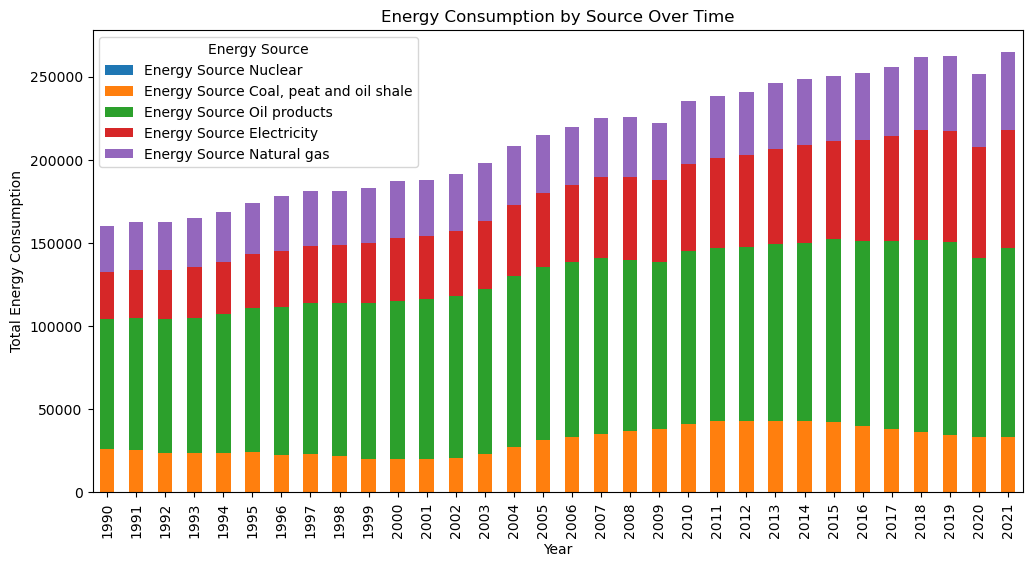

In [11]:
# Create a stack bar chart for all energy sources over 30 years period

# Exclude columns 'B' and 'C' from the DataFrame
columns_to_exclude = ['Primary Energy Consumption','Energy Consumption per Capita','CO2 Emissions']
filtered_df = final_df.drop(columns=columns_to_exclude)

# Group the data by year and calculate total energy consumption for each energy source
grouped = filtered_df.groupby('Year').sum()

# Create a bar chart to visualize the trends over time
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Energy Consumption by Source Over Time')
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption')
plt.legend(title='Energy Source')
plt.show()
